The aim of the project is to analyze the person's lifestyles and medical variables such as age, BMI, physical activity, sleep duration, blood pressure and many more, to predict the sleep disorder and its type.

 

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Info

In [5]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (374, 13)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


## Data Preprocessing Part 1

In [10]:
df.isnull().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool

In [11]:
#checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [12]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

The nan/None value in sleep disorder stands for no sleep disorder, so it is not a missing value.

In [14]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [15]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())


Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


#### Splitting the blood pressure into systolic and diastolic

In [17]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [18]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [19]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Checking the unique values from each categorical column

In [21]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


## Explorative Data Analysis

The EDA is divided into two phases:

Phase 1:  Understanding the data by plotting its variables

Phase 2: Understanding the correlation between the variables

#### Phase 1

<Axes: xlabel='Sleep Disorder', ylabel='count'>

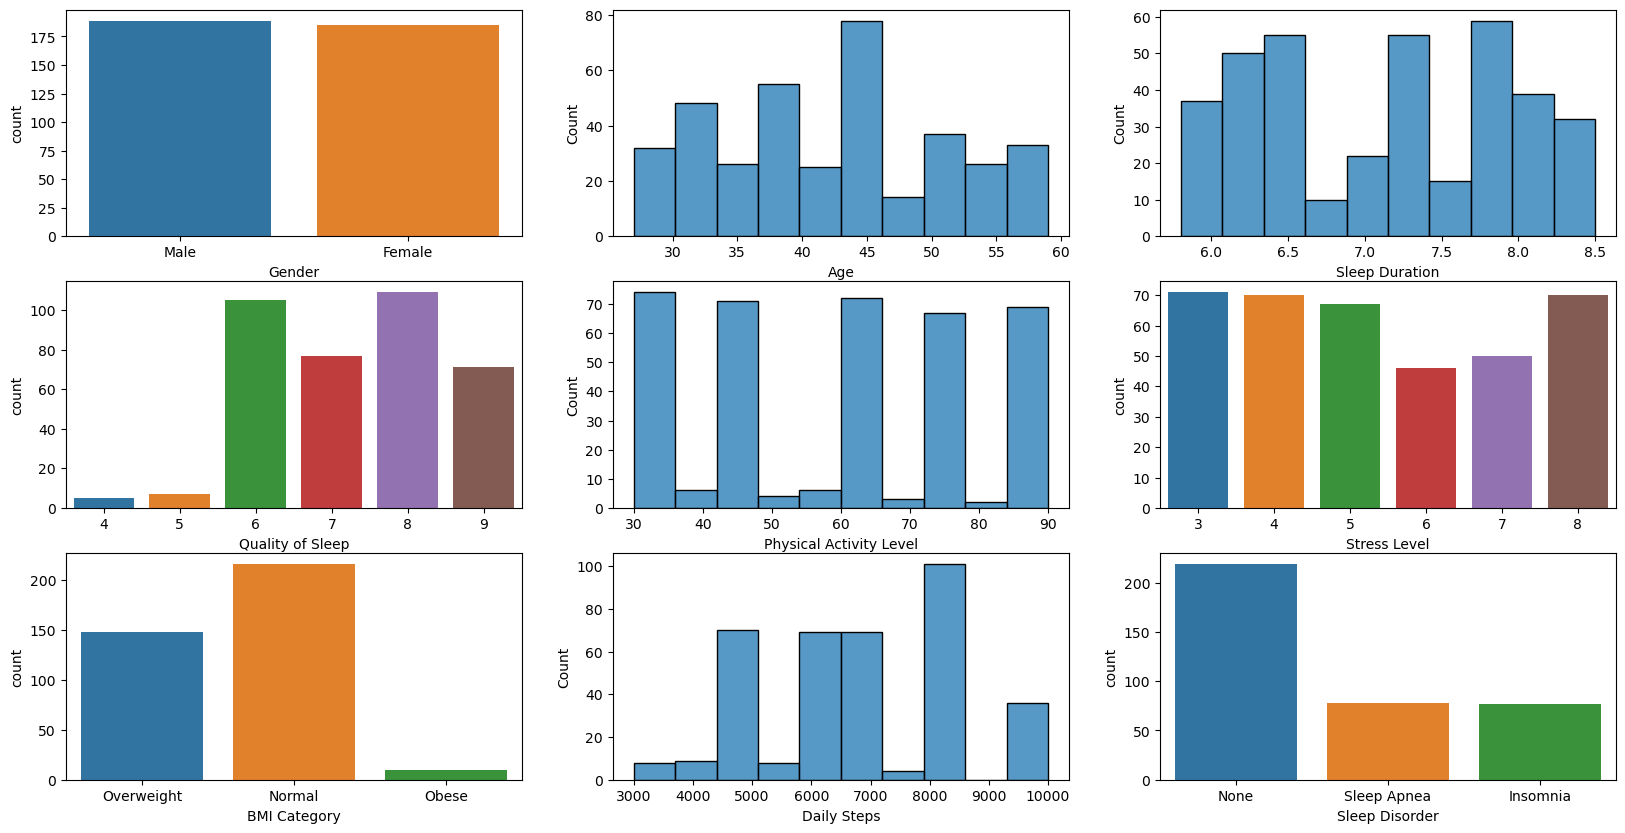

In [25]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])


The number of males and females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 which means there are getting sufficient sleep. Moreover, most of the people have normal BMI whci directly relates with the distribution of sleep disorder which shows equal number of people with and without sleep disorder.

#### Phase 2

#### Gender and Sleep Disorder

Text(0.5, 1.0, 'Gender and Sleep Disorder')

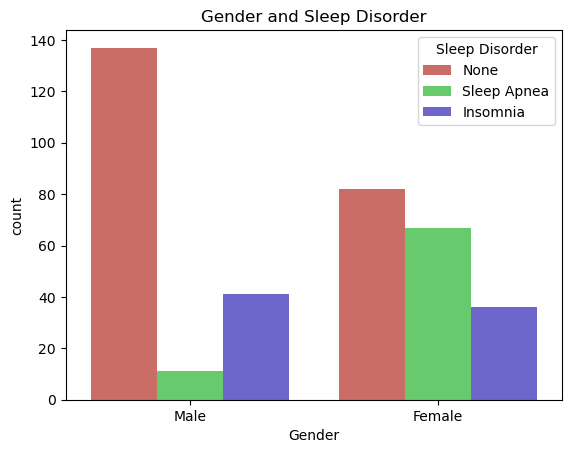

In [29]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

### Effect of Occupation on Sleep Disorder

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

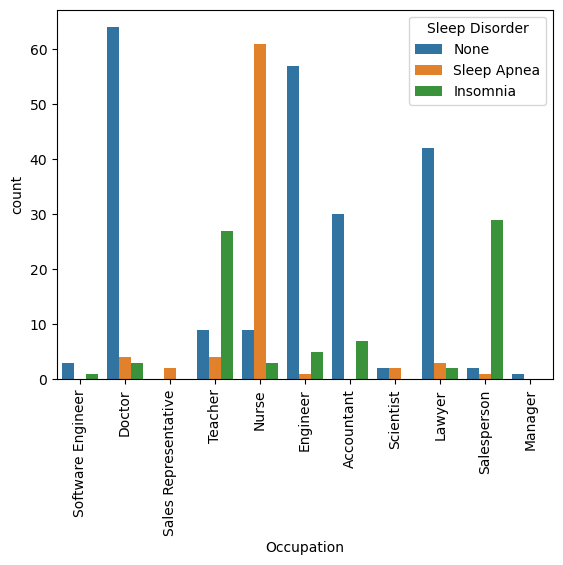

In [32]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the  most suffering from Insomia followed by teachers. However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. 
The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder. 

### BMI and Sleep Disorder

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

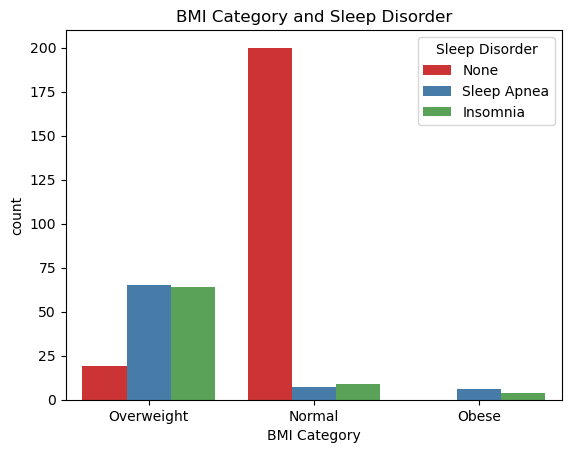

In [35]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

People with normal BMI are less likely to suffer from any sleep disorder. However, this is opposite in case of Overweight and Obese people. Overweight are more likely to suffer more from sleep disordera than Obese people.

## Data Preprocessing Part 2

#### Label Encoding for categorical variables

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [40]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


## Correlation Matrix Heatmap

<Axes: >

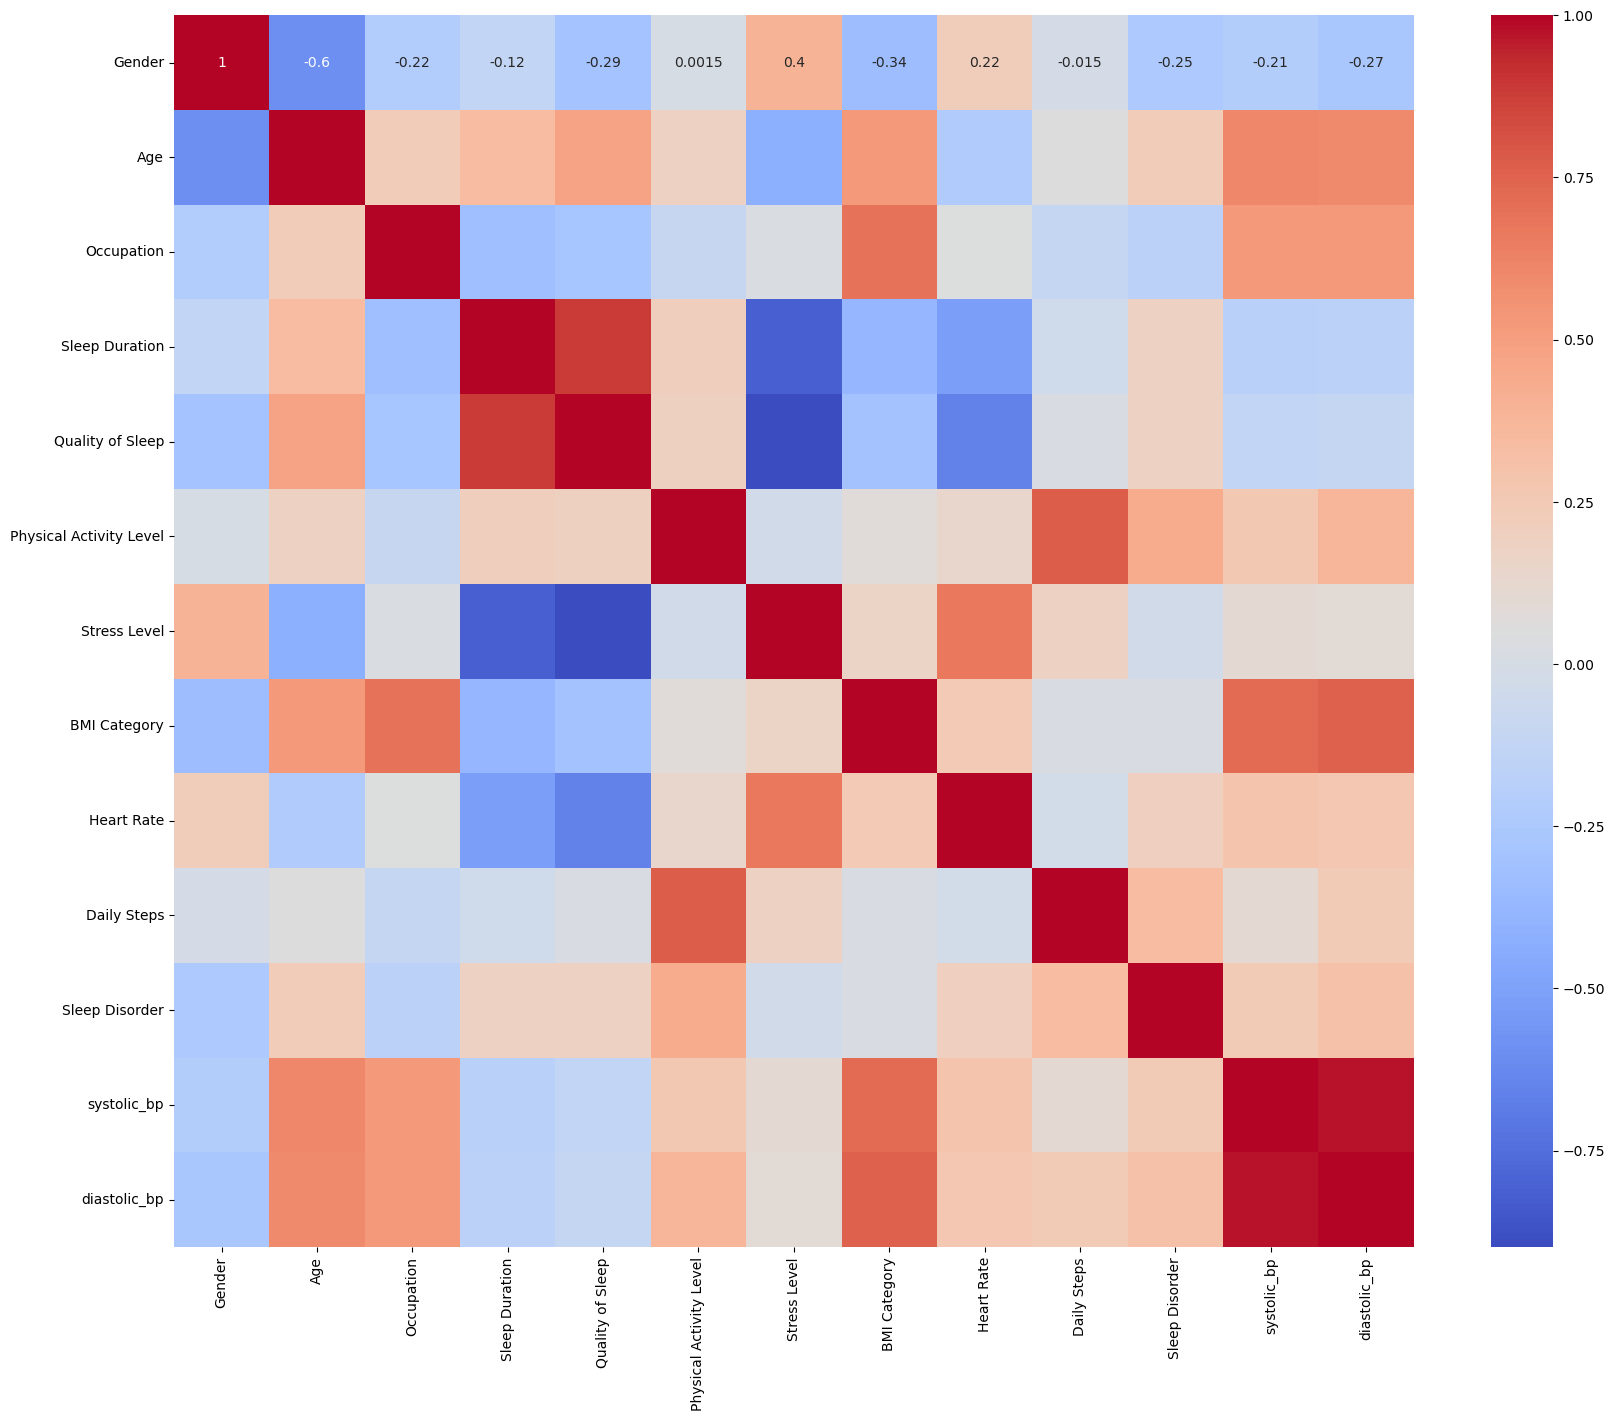

In [42]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

## Model Building

For predictiong the sleep disorder thriugh classification algorithms I will use the following algorithms:
1. Decision Tree Classifier
2. Random Forest Classifier

### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Training the model with train dataset

In [50]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9348659003831418


### Decision Tree Model Evalution

In [53]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

Using Confusion matrix heatmap to visualize the model accuracy

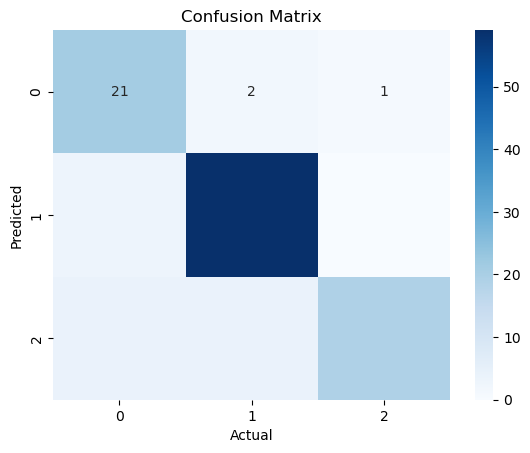

In [55]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The diagonal boxes show the count of true positive results, i.e correct predictions made by the model. The off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model.

### Dsitribution plot for predicted and actual values

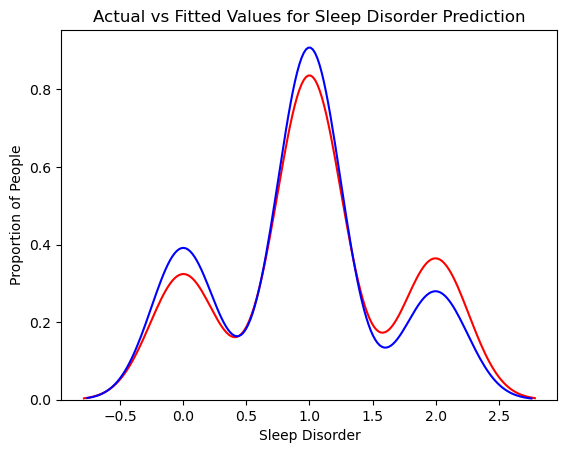

In [58]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

The actual values are represented with red and the predicted ones with blue. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. Therefore the model is not able to predict the values accurately.

##### Classification Report

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.91      0.95      0.93        62
           2       0.95      0.70      0.81        27

    accuracy                           0.88       113
   macro avg       0.87      0.84      0.85       113
weighted avg       0.88      0.88      0.87       113



The model gives pretty decent results with an accuracy of 87% and an average F1 score of 0.83. The model is able to predict the sleep disorder with a good accuracy.

### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

Training the model with train dataset

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9348659003831418


### Random Forest Classifier Evaluation

In [69]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

Using confusion matrix heatmap to visualize the model accuracy

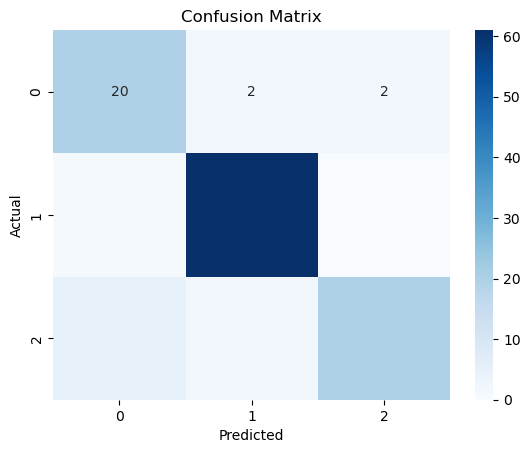

In [71]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest Classifier model  has greater accuracy than the Decision Tree Classifier model. The diagonal boxes count for the True Positives i.e correct predictions, whereas the off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model. Since the number of false positve value is less, it shows that the model is good at predicting the correct results.

### Distribution plot for predicted and acutal values

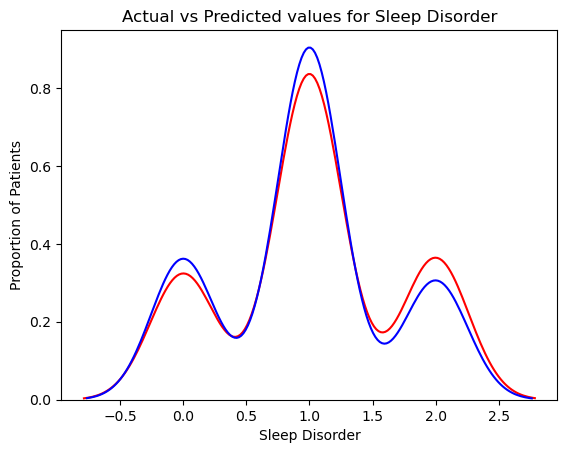

In [74]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

The Random forest classifier has improved accuracy as compared to the Decision Tree which is shown with the gap between the actual and predcited values which was wider incase of Descision Tree Classifier.

#### Classification Report

In [77]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



The Random Forest Classifier model has an accuracy of 89%  and an avergae F1 score of 0.86. From the metrics it is quite clear that the model is able to predict the sleep disorder quite effectively, with increased accuracy than Decision Tree Classifer.

## Conclusion

In my exploratory data analysis, I identified three primary drivers of sleep disorders: gender, occupation, and BMI. Men exhibit a higher incidence of insomnia, whereas women are more prone to sleep apnea. Certain professions—especially nursing—also show increased vulnerability to sleep‑related issues. BMI is a critical factor as well: individuals who are overweight or obese are markedly more likely to develop sleep disorders.

As for the classification models, both delivered solid performance, but the Random Forest Classifier was exceptional, achieving an accuracy of 89 percen.
